In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

In [2]:
barragem = pd.read_csv('/content/drive/MyDrive/Datasets/Barragens.csv',encoding='latin1')
barragem.drop('ID',axis=1,inplace=True)
barragem.head()

,Nome,Empreendedor,CPF_CNPJ,UF,Município,Latitude,Longitude,Posicionamento,Categoria de Risco - CRI,Dano Potencial Associado - DPA,...,Descrição da Estrutura Remanescente,Data de início das obras de estabilização ou descaracterização,Duração estimada em projeto das obras de estabilização ou descaracterização(em meses),A barragem voltará a operar?,Data de conclusão das obras de estabilização ou descaracterização,Data de Início do Monitoramento Ativo,Duração estimada em projeto do monitoramento ativo (em meses),Data de Início do Monitoramento Passivo,Data de conclusão estimada em projeto Monitoramento Passivo,Capacidade Total do Reservatório (m³)
0,Jacaré Inferior,COOPERATIVA DOS GARIMPEIROS DE SANTA CRUZ - CO...,34726547000190,RO,ARIQUEMES,-09°47'16.100'',-63°34'30.600'',Sul do Equador,Alta,Alta,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"410689,73"
1,MASSANGANA 01,COOPERATIVA DE PRODUTORES DE ESTANHO DO BRASIL...,26021163000144,RO,ARIQUEMES,-09°56'46.053'',-63°19'48.767'',Sul do Equador,Média,Baixa,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"31991,75"
2,Rio Santa Cruz,COOPERMETAL - COOPERATIVA METALURGICA DE RONDONIA,09259736000153,RO,ARIQUEMES,-09°45'57.100'',-63°34'06.900'',Sul do Equador,Alta,Média,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"4455613,00"
3,Jacaré Superior,COOPERATIVA DOS GARIMPEIROS DE SANTA CRUZ - CO...,34726547000190,RO,ARIQUEMES,-09°49'01.200'',-63°33'11.500'',Sul do Equador,Alta,Alta,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"68623000,03"
4,Jacaré Medio,COOPERATIVA DOS GARIMPEIROS DE SANTA CRUZ - CO...,34726547000190,RO,ARIQUEMES,-09°47'43.800'',-63°33'55.000'',Sul do Equador,Alta,Alta,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"2815305,00"


In [3]:
barragem.drop(barragem.isna().sum()[101:115].index,axis=1,inplace=True)
barragem.head()

,Nome,Empreendedor,CPF_CNPJ,UF,Município,Latitude,Longitude,Posicionamento,Categoria de Risco - CRI,Dano Potencial Associado - DPA,...,Controle de Compactação,Inclinação Média dos taludes na seção principal,Drenagem superficial,O projeto e/ou manual de operação da barragem prevê a existência de linha de praia no reservatório?,A Largura da linha de praia exigida em projeto e/ou manual de operação (m),Menor largura da linha de praia atual (m),Data de Finalização do Último Alteamento,Data de Início do Monitoramento Passivo,Data de conclusão estimada em projeto Monitoramento Passivo,Capacidade Total do Reservatório (m³)
0,Jacaré Inferior,COOPERATIVA DOS GARIMPEIROS DE SANTA CRUZ - CO...,34726547000190,RO,ARIQUEMES,-09°47'16.100'',-63°34'30.600'',Sul do Equador,Alta,Alta,...,Não houve controle tecnológico e/ou não há inf...,Ingrime (Inclinação média dos taludes na seção...,5 - Drenagem superficial inexistente,Não,0.00,0.00,-,NaN,NaN,"410689,73"
1,MASSANGANA 01,COOPERATIVA DE PRODUTORES DE ESTANHO DO BRASIL...,26021163000144,RO,ARIQUEMES,-09°56'46.053'',-63°19'48.767'',Sul do Equador,Média,Baixa,...,Não houve controle tecnológico e/ou não há inf...,Intermediário (1V:2H >= Inclinação média dos t...,NaN,-,-,-,-,NaN,NaN,"31991,75"
2,Rio Santa Cruz,COOPERMETAL - COOPERATIVA METALURGICA DE RONDONIA,09259736000153,RO,ARIQUEMES,-09°45'57.100'',-63°34'06.900'',Sul do Equador,Alta,Média,...,Não houve controle tecnológico e/ou não há inf...,Ingrime (Inclinação média dos taludes na seção...,5 - Drenagem superficial inexistente,Não,0.00,0.00,-,NaN,NaN,"4455613,00"
3,Jacaré Superior,COOPERATIVA DOS GARIMPEIROS DE SANTA CRUZ - CO...,34726547000190,RO,ARIQUEMES,-09°49'01.200'',-63°33'11.500'',Sul do Equador,Alta,Alta,...,Não houve controle tecnológico e/ou não há inf...,Ingrime (Inclinação média dos taludes na seção...,5 - Drenagem superficial inexistente,Não,0.00,0.00,-,NaN,NaN,"68623000,03"
4,Jacaré Medio,COOPERATIVA DOS GARIMPEIROS DE SANTA CRUZ - CO...,34726547000190,RO,ARIQUEMES,-09°47'43.800'',-63°33'55.000'',Sul do Equador,Alta,Alta,...,Não houve controle tecnológico e/ou não há inf...,Ingrime (Inclinação média dos taludes na seção...,5 - Drenagem superficial inexistente,Não,0.00,0.00,-,NaN,NaN,"2815305,00"


Selecionar as colunas que não estão em branco e que podem ser uteis para fazer a segmentação das barragens

coloquei a longitude e latidude para colocar no mapa depois

In [4]:
barragem = barragem[['Categoria de Risco - CRI','Dano Potencial Associado - DPA','Necessita de PAEBM','Inserido na PNSB',
                     'Nível de Emergência','Tipo de Barragem de Mineração',
                     'Situação operacional da Back Up Dam','Vida útil prevista da Back Up Dam (Anos)',
                     'Processos associados (Back Up Dam)','Posicionamento (Back Up Dam)','Altura Máxima do projeto da Back Up Dam (m)',
                     'Volume do projeto da Back Up Dam (m³)','Teor (%) do minério principal inserido no rejeito',
                     'Altura máxima do projeto licenciado (m)','Latitude','Longitude']]

barragem.head()

,Categoria de Risco - CRI,Dano Potencial Associado - DPA,Necessita de PAEBM,Inserido na PNSB,Nível de Emergência,Tipo de Barragem de Mineração,Situação operacional da Back Up Dam,Vida útil prevista da Back Up Dam (Anos),Processos associados (Back Up Dam),Posicionamento (Back Up Dam),Altura Máxima do projeto da Back Up Dam (m),Volume do projeto da Back Up Dam (m³),Teor (%) do minério principal inserido no rejeito,Altura máxima do projeto licenciado (m),Latitude,Longitude
0,Alta,Alta,Sim,Sim,Emergência Nivel 1,Barragem/Barramento/Dique,Não se aplica a esse tipo de barragem,Não se aplica a esse tipo de barragem,Não se aplica a esse tipo de barragem,Não se aplica a esse tipo de barragem,Não se aplica a esse tipo de barragem,Não se aplica a esse tipo de barragem,"0,05","10,00",-09°47'16.100'',-63°34'30.600''
1,Média,Baixa,Não,Não,Sem emergência,Barragem/Barramento/Dique,Não se aplica a esse tipo de barragem,Não se aplica a esse tipo de barragem,Não se aplica a esse tipo de barragem,Não se aplica a esse tipo de barragem,Não se aplica a esse tipo de barragem,Não se aplica a esse tipo de barragem,"0,04","0,50",-09°56'46.053'',-63°19'48.767''
2,Alta,Média,Não,Sim,Emergência Nivel 1,Barragem/Barramento/Dique,Não se aplica a esse tipo de barragem,Não se aplica a esse tipo de barragem,Não se aplica a esse tipo de barragem,Não se aplica a esse tipo de barragem,Não se aplica a esse tipo de barragem,Não se aplica a esse tipo de barragem,"0,05","10,00",-09°45'57.100'',-63°34'06.900''
3,Alta,Alta,Sim,Sim,Emergência Nivel 1,Barragem/Barramento/Dique,Não se aplica a esse tipo de barragem,Não se aplica a esse tipo de barragem,Não se aplica a esse tipo de barragem,Não se aplica a esse tipo de barragem,Não se aplica a esse tipo de barragem,Não se aplica a esse tipo de barragem,"0,04","10,00",-09°49'01.200'',-63°33'11.500''
4,Alta,Alta,Sim,Sim,Emergência Nivel 1,Barragem/Barramento/Dique,Não se aplica a esse tipo de barragem,Não se aplica a esse tipo de barragem,Não se aplica a esse tipo de barragem,Não se aplica a esse tipo de barragem,Não se aplica a esse tipo de barragem,Não se aplica a esse tipo de barragem,"0,05","10,00",-09°47'43.800'',-63°33'55.000''


# Pré-processamento

In [5]:
barragem['Dano Potencial Associado - DPA'].unique()

array(['Alta', 'Baixa', 'Média', 'Não se aplica'], dtype=object)

In [6]:
barragem['Categoria de Risco - CRI'] = barragem['Categoria de Risco - CRI'].map({'Não se aplica':0,'Baixa':1,
                                                                                 'Média':2,'Alta':3})
barragem.head()

<ipython-input-6-5741b6062f40>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  barragem['Categoria de Risco - CRI'] = barragem['Categoria de Risco - CRI'].map({'Não se aplica':0,'Baixa':1,


,Categoria de Risco - CRI,Dano Potencial Associado - DPA,Necessita de PAEBM,Inserido na PNSB,Nível de Emergência,Tipo de Barragem de Mineração,Situação operacional da Back Up Dam,Vida útil prevista da Back Up Dam (Anos),Processos associados (Back Up Dam),Posicionamento (Back Up Dam),Altura Máxima do projeto da Back Up Dam (m),Volume do projeto da Back Up Dam (m³),Teor (%) do minério principal inserido no rejeito,Altura máxima do projeto licenciado (m),Latitude,Longitude
0,3,Alta,Sim,Sim,Emergência Nivel 1,Barragem/Barramento/Dique,Não se aplica a esse tipo de barragem,Não se aplica a esse tipo de barragem,Não se aplica a esse tipo de barragem,Não se aplica a esse tipo de barragem,Não se aplica a esse tipo de barragem,Não se aplica a esse tipo de barragem,"0,05","10,00",-09°47'16.100'',-63°34'30.600''
1,2,Baixa,Não,Não,Sem emergência,Barragem/Barramento/Dique,Não se aplica a esse tipo de barragem,Não se aplica a esse tipo de barragem,Não se aplica a esse tipo de barragem,Não se aplica a esse tipo de barragem,Não se aplica a esse tipo de barragem,Não se aplica a esse tipo de barragem,"0,04","0,50",-09°56'46.053'',-63°19'48.767''
2,3,Média,Não,Sim,Emergência Nivel 1,Barragem/Barramento/Dique,Não se aplica a esse tipo de barragem,Não se aplica a esse tipo de barragem,Não se aplica a esse tipo de barragem,Não se aplica a esse tipo de barragem,Não se aplica a esse tipo de barragem,Não se aplica a esse tipo de barragem,"0,05","10,00",-09°45'57.100'',-63°34'06.900''
3,3,Alta,Sim,Sim,Emergência Nivel 1,Barragem/Barramento/Dique,Não se aplica a esse tipo de barragem,Não se aplica a esse tipo de barragem,Não se aplica a esse tipo de barragem,Não se aplica a esse tipo de barragem,Não se aplica a esse tipo de barragem,Não se aplica a esse tipo de barragem,"0,04","10,00",-09°49'01.200'',-63°33'11.500''
4,3,Alta,Sim,Sim,Emergência Nivel 1,Barragem/Barramento/Dique,Não se aplica a esse tipo de barragem,Não se aplica a esse tipo de barragem,Não se aplica a esse tipo de barragem,Não se aplica a esse tipo de barragem,Não se aplica a esse tipo de barragem,Não se aplica a esse tipo de barragem,"0,05","10,00",-09°47'43.800'',-63°33'55.000''


In [7]:
barragem['Dano Potencial Associado - DPA'] = barragem['Dano Potencial Associado - DPA'].map({'Não se aplica':0,'Baixa':1,
                                                                                 'Média':2,'Alta':3})
barragem.head()

<ipython-input-7-50df6ed40435>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  barragem['Dano Potencial Associado - DPA'] = barragem['Dano Potencial Associado - DPA'].map({'Não se aplica':0,'Baixa':1,


,Categoria de Risco - CRI,Dano Potencial Associado - DPA,Necessita de PAEBM,Inserido na PNSB,Nível de Emergência,Tipo de Barragem de Mineração,Situação operacional da Back Up Dam,Vida útil prevista da Back Up Dam (Anos),Processos associados (Back Up Dam),Posicionamento (Back Up Dam),Altura Máxima do projeto da Back Up Dam (m),Volume do projeto da Back Up Dam (m³),Teor (%) do minério principal inserido no rejeito,Altura máxima do projeto licenciado (m),Latitude,Longitude
0,3,3,Sim,Sim,Emergência Nivel 1,Barragem/Barramento/Dique,Não se aplica a esse tipo de barragem,Não se aplica a esse tipo de barragem,Não se aplica a esse tipo de barragem,Não se aplica a esse tipo de barragem,Não se aplica a esse tipo de barragem,Não se aplica a esse tipo de barragem,"0,05","10,00",-09°47'16.100'',-63°34'30.600''
1,2,1,Não,Não,Sem emergência,Barragem/Barramento/Dique,Não se aplica a esse tipo de barragem,Não se aplica a esse tipo de barragem,Não se aplica a esse tipo de barragem,Não se aplica a esse tipo de barragem,Não se aplica a esse tipo de barragem,Não se aplica a esse tipo de barragem,"0,04","0,50",-09°56'46.053'',-63°19'48.767''
2,3,2,Não,Sim,Emergência Nivel 1,Barragem/Barramento/Dique,Não se aplica a esse tipo de barragem,Não se aplica a esse tipo de barragem,Não se aplica a esse tipo de barragem,Não se aplica a esse tipo de barragem,Não se aplica a esse tipo de barragem,Não se aplica a esse tipo de barragem,"0,05","10,00",-09°45'57.100'',-63°34'06.900''
3,3,3,Sim,Sim,Emergência Nivel 1,Barragem/Barramento/Dique,Não se aplica a esse tipo de barragem,Não se aplica a esse tipo de barragem,Não se aplica a esse tipo de barragem,Não se aplica a esse tipo de barragem,Não se aplica a esse tipo de barragem,Não se aplica a esse tipo de barragem,"0,04","10,00",-09°49'01.200'',-63°33'11.500''
4,3,3,Sim,Sim,Emergência Nivel 1,Barragem/Barramento/Dique,Não se aplica a esse tipo de barragem,Não se aplica a esse tipo de barragem,Não se aplica a esse tipo de barragem,Não se aplica a esse tipo de barragem,Não se aplica a esse tipo de barragem,Não se aplica a esse tipo de barragem,"0,05","10,00",-09°47'43.800'',-63°33'55.000''


In [8]:
barragem['Necessita de PAEBM'] = np.where(barragem['Necessita de PAEBM']=='Não',0,1)
barragem['Inserido na PNSB'] = np.where(barragem['Inserido na PNSB']=='Não',0,1)

In [9]:
barragem['Nível de Emergência'].unique()

array(['Emergência Nivel 1', 'Sem emergência', 'Nível de Alerta',
       'Emergência Nivel 3', 'Emergência Nivel 2'], dtype=object)

In [10]:
barragem['Nível de Emergência'] = barragem['Nível de Emergência'].map({'Sem emergência':0,'Emergência Nivel 1':1,
                                                                      'Emergência Nivel 2':2,'Emergência Nivel 3':3,
                                                                      'Nível de Alerta':4})
barragem.head()

,Categoria de Risco - CRI,Dano Potencial Associado - DPA,Necessita de PAEBM,Inserido na PNSB,Nível de Emergência,Tipo de Barragem de Mineração,Situação operacional da Back Up Dam,Vida útil prevista da Back Up Dam (Anos),Processos associados (Back Up Dam),Posicionamento (Back Up Dam),Altura Máxima do projeto da Back Up Dam (m),Volume do projeto da Back Up Dam (m³),Teor (%) do minério principal inserido no rejeito,Altura máxima do projeto licenciado (m),Latitude,Longitude
0,3,3,1,1,1,Barragem/Barramento/Dique,Não se aplica a esse tipo de barragem,Não se aplica a esse tipo de barragem,Não se aplica a esse tipo de barragem,Não se aplica a esse tipo de barragem,Não se aplica a esse tipo de barragem,Não se aplica a esse tipo de barragem,"0,05","10,00",-09°47'16.100'',-63°34'30.600''
1,2,1,0,0,0,Barragem/Barramento/Dique,Não se aplica a esse tipo de barragem,Não se aplica a esse tipo de barragem,Não se aplica a esse tipo de barragem,Não se aplica a esse tipo de barragem,Não se aplica a esse tipo de barragem,Não se aplica a esse tipo de barragem,"0,04","0,50",-09°56'46.053'',-63°19'48.767''
2,3,2,0,1,1,Barragem/Barramento/Dique,Não se aplica a esse tipo de barragem,Não se aplica a esse tipo de barragem,Não se aplica a esse tipo de barragem,Não se aplica a esse tipo de barragem,Não se aplica a esse tipo de barragem,Não se aplica a esse tipo de barragem,"0,05","10,00",-09°45'57.100'',-63°34'06.900''
3,3,3,1,1,1,Barragem/Barramento/Dique,Não se aplica a esse tipo de barragem,Não se aplica a esse tipo de barragem,Não se aplica a esse tipo de barragem,Não se aplica a esse tipo de barragem,Não se aplica a esse tipo de barragem,Não se aplica a esse tipo de barragem,"0,04","10,00",-09°49'01.200'',-63°33'11.500''
4,3,3,1,1,1,Barragem/Barramento/Dique,Não se aplica a esse tipo de barragem,Não se aplica a esse tipo de barragem,Não se aplica a esse tipo de barragem,Não se aplica a esse tipo de barragem,Não se aplica a esse tipo de barragem,Não se aplica a esse tipo de barragem,"0,05","10,00",-09°47'43.800'',-63°33'55.000''


In [11]:
barragem['Tipo de Barragem de Mineração'].unique()

array(['Barragem/Barramento/Dique', 'Cava com Barramento Construído', nan,
       'Empilhamento drenado construído hidraulicamente e suscetível à liquefação'],
      dtype=object)

In [12]:
barragem['Situação operacional da Back Up Dam'].unique()

array(['Não se aplica a esse tipo de barragem', 'Concluída'], dtype=object)

In [13]:
barragem['Vida útil prevista da Back Up Dam (Anos)'].unique()

array(['Não se aplica a esse tipo de barragem', '10,00', '7,00', '50,00',
       '5,00'], dtype=object)

In [14]:
barragem['Vida útil prevista da Back Up Dam (Anos)'] = np.where(barragem['Vida útil prevista da Back Up Dam (Anos)']=='Não se aplica a esse tipo de barragem',
                                                                '0',barragem['Vida útil prevista da Back Up Dam (Anos)'])
barragem.head()

,Categoria de Risco - CRI,Dano Potencial Associado - DPA,Necessita de PAEBM,Inserido na PNSB,Nível de Emergência,Tipo de Barragem de Mineração,Situação operacional da Back Up Dam,Vida útil prevista da Back Up Dam (Anos),Processos associados (Back Up Dam),Posicionamento (Back Up Dam),Altura Máxima do projeto da Back Up Dam (m),Volume do projeto da Back Up Dam (m³),Teor (%) do minério principal inserido no rejeito,Altura máxima do projeto licenciado (m),Latitude,Longitude
0,3,3,1,1,1,Barragem/Barramento/Dique,Não se aplica a esse tipo de barragem,0,Não se aplica a esse tipo de barragem,Não se aplica a esse tipo de barragem,Não se aplica a esse tipo de barragem,Não se aplica a esse tipo de barragem,"0,05","10,00",-09°47'16.100'',-63°34'30.600''
1,2,1,0,0,0,Barragem/Barramento/Dique,Não se aplica a esse tipo de barragem,0,Não se aplica a esse tipo de barragem,Não se aplica a esse tipo de barragem,Não se aplica a esse tipo de barragem,Não se aplica a esse tipo de barragem,"0,04","0,50",-09°56'46.053'',-63°19'48.767''
2,3,2,0,1,1,Barragem/Barramento/Dique,Não se aplica a esse tipo de barragem,0,Não se aplica a esse tipo de barragem,Não se aplica a esse tipo de barragem,Não se aplica a esse tipo de barragem,Não se aplica a esse tipo de barragem,"0,05","10,00",-09°45'57.100'',-63°34'06.900''
3,3,3,1,1,1,Barragem/Barramento/Dique,Não se aplica a esse tipo de barragem,0,Não se aplica a esse tipo de barragem,Não se aplica a esse tipo de barragem,Não se aplica a esse tipo de barragem,Não se aplica a esse tipo de barragem,"0,04","10,00",-09°49'01.200'',-63°33'11.500''
4,3,3,1,1,1,Barragem/Barramento/Dique,Não se aplica a esse tipo de barragem,0,Não se aplica a esse tipo de barragem,Não se aplica a esse tipo de barragem,Não se aplica a esse tipo de barragem,Não se aplica a esse tipo de barragem,"0,05","10,00",-09°47'43.800'',-63°33'55.000''


In [15]:
barragem['Vida útil prevista da Back Up Dam (Anos)'] = barragem['Vida útil prevista da Back Up Dam (Anos)'].str.replace(',','.')
barragem['Vida útil prevista da Back Up Dam (Anos)'] = barragem['Vida útil prevista da Back Up Dam (Anos)'].astype(float)
barragem.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 934 entries, 0 to 933
Data columns (total 16 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Categoria de Risco - CRI                           934 non-null    int64  
 1   Dano Potencial Associado - DPA                     934 non-null    int64  
 2   Necessita de PAEBM                                 934 non-null    int64  
 3   Inserido na PNSB                                   934 non-null    int64  
 4   Nível de Emergência                                934 non-null    int64  
 5   Tipo de Barragem de Mineração                      908 non-null    object 
 6   Situação operacional da Back Up Dam                934 non-null    object 
 7   Vida útil prevista da Back Up Dam (Anos)           934 non-null    float64
 8   Processos associados (Back Up Dam)                 934 non-null    object 
 9   Posicionam

In [16]:
barragem['Teor (%) do minério principal inserido no rejeito'] = np.where(barragem['Teor (%) do minério principal inserido no rejeito']=='Não se aplica a esse tipo de barragem',
                                                                '0',barragem['Teor (%) do minério principal inserido no rejeito'])
barragem['Teor (%) do minério principal inserido no rejeito'] = barragem['Teor (%) do minério principal inserido no rejeito'].str.replace(',','.')
barragem['Teor (%) do minério principal inserido no rejeito'] = barragem['Teor (%) do minério principal inserido no rejeito'].astype(float)

barragem['Altura máxima do projeto licenciado (m)'] = barragem['Altura máxima do projeto licenciado (m)'].str.replace(',','.')
barragem['Altura máxima do projeto licenciado (m)'] = barragem['Altura máxima do projeto licenciado (m)'].astype(float)

In [17]:
barragem.head()

,Categoria de Risco - CRI,Dano Potencial Associado - DPA,Necessita de PAEBM,Inserido na PNSB,Nível de Emergência,Tipo de Barragem de Mineração,Situação operacional da Back Up Dam,Vida útil prevista da Back Up Dam (Anos),Processos associados (Back Up Dam),Posicionamento (Back Up Dam),Altura Máxima do projeto da Back Up Dam (m),Volume do projeto da Back Up Dam (m³),Teor (%) do minério principal inserido no rejeito,Altura máxima do projeto licenciado (m),Latitude,Longitude
0,3,3,1,1,1,Barragem/Barramento/Dique,Não se aplica a esse tipo de barragem,0.0,Não se aplica a esse tipo de barragem,Não se aplica a esse tipo de barragem,Não se aplica a esse tipo de barragem,Não se aplica a esse tipo de barragem,0.05,10.0,-09°47'16.100'',-63°34'30.600''
1,2,1,0,0,0,Barragem/Barramento/Dique,Não se aplica a esse tipo de barragem,0.0,Não se aplica a esse tipo de barragem,Não se aplica a esse tipo de barragem,Não se aplica a esse tipo de barragem,Não se aplica a esse tipo de barragem,0.04,0.5,-09°56'46.053'',-63°19'48.767''
2,3,2,0,1,1,Barragem/Barramento/Dique,Não se aplica a esse tipo de barragem,0.0,Não se aplica a esse tipo de barragem,Não se aplica a esse tipo de barragem,Não se aplica a esse tipo de barragem,Não se aplica a esse tipo de barragem,0.05,10.0,-09°45'57.100'',-63°34'06.900''
3,3,3,1,1,1,Barragem/Barramento/Dique,Não se aplica a esse tipo de barragem,0.0,Não se aplica a esse tipo de barragem,Não se aplica a esse tipo de barragem,Não se aplica a esse tipo de barragem,Não se aplica a esse tipo de barragem,0.04,10.0,-09°49'01.200'',-63°33'11.500''
4,3,3,1,1,1,Barragem/Barramento/Dique,Não se aplica a esse tipo de barragem,0.0,Não se aplica a esse tipo de barragem,Não se aplica a esse tipo de barragem,Não se aplica a esse tipo de barragem,Não se aplica a esse tipo de barragem,0.05,10.0,-09°47'43.800'',-63°33'55.000''


In [18]:
barragem['Altura Máxima do projeto da Back Up Dam (m)'] = np.where(barragem['Altura Máxima do projeto da Back Up Dam (m)']=='Não se aplica a esse tipo de barragem',
                                                                '0',barragem['Altura Máxima do projeto da Back Up Dam (m)'])
barragem['Altura Máxima do projeto da Back Up Dam (m)'] = barragem['Altura Máxima do projeto da Back Up Dam (m)'].str.replace(',','.')
barragem['Altura Máxima do projeto da Back Up Dam (m)'] = barragem['Altura Máxima do projeto da Back Up Dam (m)'].astype(float)

In [19]:
barragem = barragem.drop('Volume do projeto da Back Up Dam (m³)',axis=1)
barragem.head()

,Categoria de Risco - CRI,Dano Potencial Associado - DPA,Necessita de PAEBM,Inserido na PNSB,Nível de Emergência,Tipo de Barragem de Mineração,Situação operacional da Back Up Dam,Vida útil prevista da Back Up Dam (Anos),Processos associados (Back Up Dam),Posicionamento (Back Up Dam),Altura Máxima do projeto da Back Up Dam (m),Teor (%) do minério principal inserido no rejeito,Altura máxima do projeto licenciado (m),Latitude,Longitude
0,3,3,1,1,1,Barragem/Barramento/Dique,Não se aplica a esse tipo de barragem,0.0,Não se aplica a esse tipo de barragem,Não se aplica a esse tipo de barragem,0.0,0.05,10.0,-09°47'16.100'',-63°34'30.600''
1,2,1,0,0,0,Barragem/Barramento/Dique,Não se aplica a esse tipo de barragem,0.0,Não se aplica a esse tipo de barragem,Não se aplica a esse tipo de barragem,0.0,0.04,0.5,-09°56'46.053'',-63°19'48.767''
2,3,2,0,1,1,Barragem/Barramento/Dique,Não se aplica a esse tipo de barragem,0.0,Não se aplica a esse tipo de barragem,Não se aplica a esse tipo de barragem,0.0,0.05,10.0,-09°45'57.100'',-63°34'06.900''
3,3,3,1,1,1,Barragem/Barramento/Dique,Não se aplica a esse tipo de barragem,0.0,Não se aplica a esse tipo de barragem,Não se aplica a esse tipo de barragem,0.0,0.04,10.0,-09°49'01.200'',-63°33'11.500''
4,3,3,1,1,1,Barragem/Barramento/Dique,Não se aplica a esse tipo de barragem,0.0,Não se aplica a esse tipo de barragem,Não se aplica a esse tipo de barragem,0.0,0.05,10.0,-09°47'43.800'',-63°33'55.000''


In [20]:
barragem['Situação operacional da Back Up Dam'] = np.where(barragem['Situação operacional da Back Up Dam']=='Não se aplica a esse tipo de barragem',
                                                           0,1)
barragem.head()

,Categoria de Risco - CRI,Dano Potencial Associado - DPA,Necessita de PAEBM,Inserido na PNSB,Nível de Emergência,Tipo de Barragem de Mineração,Situação operacional da Back Up Dam,Vida útil prevista da Back Up Dam (Anos),Processos associados (Back Up Dam),Posicionamento (Back Up Dam),Altura Máxima do projeto da Back Up Dam (m),Teor (%) do minério principal inserido no rejeito,Altura máxima do projeto licenciado (m),Latitude,Longitude
0,3,3,1,1,1,Barragem/Barramento/Dique,0,0.0,Não se aplica a esse tipo de barragem,Não se aplica a esse tipo de barragem,0.0,0.05,10.0,-09°47'16.100'',-63°34'30.600''
1,2,1,0,0,0,Barragem/Barramento/Dique,0,0.0,Não se aplica a esse tipo de barragem,Não se aplica a esse tipo de barragem,0.0,0.04,0.5,-09°56'46.053'',-63°19'48.767''
2,3,2,0,1,1,Barragem/Barramento/Dique,0,0.0,Não se aplica a esse tipo de barragem,Não se aplica a esse tipo de barragem,0.0,0.05,10.0,-09°45'57.100'',-63°34'06.900''
3,3,3,1,1,1,Barragem/Barramento/Dique,0,0.0,Não se aplica a esse tipo de barragem,Não se aplica a esse tipo de barragem,0.0,0.04,10.0,-09°49'01.200'',-63°33'11.500''
4,3,3,1,1,1,Barragem/Barramento/Dique,0,0.0,Não se aplica a esse tipo de barragem,Não se aplica a esse tipo de barragem,0.0,0.05,10.0,-09°47'43.800'',-63°33'55.000''


In [21]:
barragem['Posicionamento (Back Up Dam)'] = np.where(barragem['Posicionamento (Back Up Dam)']=='Posicionamento (Back Up Dam)',
                                                           0,1)
barragem.head()

,Categoria de Risco - CRI,Dano Potencial Associado - DPA,Necessita de PAEBM,Inserido na PNSB,Nível de Emergência,Tipo de Barragem de Mineração,Situação operacional da Back Up Dam,Vida útil prevista da Back Up Dam (Anos),Processos associados (Back Up Dam),Posicionamento (Back Up Dam),Altura Máxima do projeto da Back Up Dam (m),Teor (%) do minério principal inserido no rejeito,Altura máxima do projeto licenciado (m),Latitude,Longitude
0,3,3,1,1,1,Barragem/Barramento/Dique,0,0.0,Não se aplica a esse tipo de barragem,1,0.0,0.05,10.0,-09°47'16.100'',-63°34'30.600''
1,2,1,0,0,0,Barragem/Barramento/Dique,0,0.0,Não se aplica a esse tipo de barragem,1,0.0,0.04,0.5,-09°56'46.053'',-63°19'48.767''
2,3,2,0,1,1,Barragem/Barramento/Dique,0,0.0,Não se aplica a esse tipo de barragem,1,0.0,0.05,10.0,-09°45'57.100'',-63°34'06.900''
3,3,3,1,1,1,Barragem/Barramento/Dique,0,0.0,Não se aplica a esse tipo de barragem,1,0.0,0.04,10.0,-09°49'01.200'',-63°33'11.500''
4,3,3,1,1,1,Barragem/Barramento/Dique,0,0.0,Não se aplica a esse tipo de barragem,1,0.0,0.05,10.0,-09°47'43.800'',-63°33'55.000''


In [22]:
barragem = barragem.drop('Processos associados (Back Up Dam)',axis=1)
barragem.head()

,Categoria de Risco - CRI,Dano Potencial Associado - DPA,Necessita de PAEBM,Inserido na PNSB,Nível de Emergência,Tipo de Barragem de Mineração,Situação operacional da Back Up Dam,Vida útil prevista da Back Up Dam (Anos),Posicionamento (Back Up Dam),Altura Máxima do projeto da Back Up Dam (m),Teor (%) do minério principal inserido no rejeito,Altura máxima do projeto licenciado (m),Latitude,Longitude
0,3,3,1,1,1,Barragem/Barramento/Dique,0,0.0,1,0.0,0.05,10.0,-09°47'16.100'',-63°34'30.600''
1,2,1,0,0,0,Barragem/Barramento/Dique,0,0.0,1,0.0,0.04,0.5,-09°56'46.053'',-63°19'48.767''
2,3,2,0,1,1,Barragem/Barramento/Dique,0,0.0,1,0.0,0.05,10.0,-09°45'57.100'',-63°34'06.900''
3,3,3,1,1,1,Barragem/Barramento/Dique,0,0.0,1,0.0,0.04,10.0,-09°49'01.200'',-63°33'11.500''
4,3,3,1,1,1,Barragem/Barramento/Dique,0,0.0,1,0.0,0.05,10.0,-09°47'43.800'',-63°33'55.000''


In [23]:
barragem = pd.get_dummies(barragem,columns=['Tipo de Barragem de Mineração'])
barragem.head()

,Categoria de Risco - CRI,Dano Potencial Associado - DPA,Necessita de PAEBM,Inserido na PNSB,Nível de Emergência,Situação operacional da Back Up Dam,Vida útil prevista da Back Up Dam (Anos),Posicionamento (Back Up Dam),Altura Máxima do projeto da Back Up Dam (m),Teor (%) do minério principal inserido no rejeito,Altura máxima do projeto licenciado (m),Latitude,Longitude,Tipo de Barragem de Mineração_Barragem/Barramento/Dique,Tipo de Barragem de Mineração_Cava com Barramento Construído,Tipo de Barragem de Mineração_Empilhamento drenado construído hidraulicamente e suscetível à liquefação
0,3,3,1,1,1,0,0.0,1,0.0,0.05,10.0,-09°47'16.100'',-63°34'30.600'',True,False,False
1,2,1,0,0,0,0,0.0,1,0.0,0.04,0.5,-09°56'46.053'',-63°19'48.767'',True,False,False
2,3,2,0,1,1,0,0.0,1,0.0,0.05,10.0,-09°45'57.100'',-63°34'06.900'',True,False,False
3,3,3,1,1,1,0,0.0,1,0.0,0.04,10.0,-09°49'01.200'',-63°33'11.500'',True,False,False
4,3,3,1,1,1,0,0.0,1,0.0,0.05,10.0,-09°47'43.800'',-63°33'55.000'',True,False,False


In [24]:
barragem['Tipo de Barragem de Mineração_Barragem/Barramento/Dique'] = np.where(barragem['Tipo de Barragem de Mineração_Barragem/Barramento/Dique']==False,
                                                                               0,1)

barragem['Tipo de Barragem de Mineração_Cava com Barramento Construído'] = np.where(barragem['Tipo de Barragem de Mineração_Cava com Barramento Construído']==False,
                                                                               0,1)
barragem['Tipo de Barragem de Mineração_Empilhamento drenado construído hidraulicamente e suscetível à liquefação'] = np.where(barragem['Tipo de Barragem de Mineração_Empilhamento drenado construído hidraulicamente e suscetível à liquefação']==False,
                                                                               0,1)

In [25]:
barragem.head()

,Categoria de Risco - CRI,Dano Potencial Associado - DPA,Necessita de PAEBM,Inserido na PNSB,Nível de Emergência,Situação operacional da Back Up Dam,Vida útil prevista da Back Up Dam (Anos),Posicionamento (Back Up Dam),Altura Máxima do projeto da Back Up Dam (m),Teor (%) do minério principal inserido no rejeito,Altura máxima do projeto licenciado (m),Latitude,Longitude,Tipo de Barragem de Mineração_Barragem/Barramento/Dique,Tipo de Barragem de Mineração_Cava com Barramento Construído,Tipo de Barragem de Mineração_Empilhamento drenado construído hidraulicamente e suscetível à liquefação
0,3,3,1,1,1,0,0.0,1,0.0,0.05,10.0,-09°47'16.100'',-63°34'30.600'',1,0,0
1,2,1,0,0,0,0,0.0,1,0.0,0.04,0.5,-09°56'46.053'',-63°19'48.767'',1,0,0
2,3,2,0,1,1,0,0.0,1,0.0,0.05,10.0,-09°45'57.100'',-63°34'06.900'',1,0,0
3,3,3,1,1,1,0,0.0,1,0.0,0.04,10.0,-09°49'01.200'',-63°33'11.500'',1,0,0
4,3,3,1,1,1,0,0.0,1,0.0,0.05,10.0,-09°47'43.800'',-63°33'55.000'',1,0,0


In [26]:
barragem.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 934 entries, 0 to 933
Data columns (total 16 columns):
 #   Column                                                                                                   Non-Null Count  Dtype  
---  ------                                                                                                   --------------  -----  
 0   Categoria de Risco - CRI                                                                                 934 non-null    int64  
 1   Dano Potencial Associado - DPA                                                                           934 non-null    int64  
 2   Necessita de PAEBM                                                                                       934 non-null    int64  
 3   Inserido na PNSB                                                                                         934 non-null    int64  
 4   Nível de Emergência                                                                   

In [27]:
barragem.drop('Altura máxima do projeto licenciado (m)',axis=1,inplace=True)

In [28]:
barragem.dropna(inplace=True)
barragem.head()

,Categoria de Risco - CRI,Dano Potencial Associado - DPA,Necessita de PAEBM,Inserido na PNSB,Nível de Emergência,Situação operacional da Back Up Dam,Vida útil prevista da Back Up Dam (Anos),Posicionamento (Back Up Dam),Altura Máxima do projeto da Back Up Dam (m),Teor (%) do minério principal inserido no rejeito,Latitude,Longitude,Tipo de Barragem de Mineração_Barragem/Barramento/Dique,Tipo de Barragem de Mineração_Cava com Barramento Construído,Tipo de Barragem de Mineração_Empilhamento drenado construído hidraulicamente e suscetível à liquefação
0,3,3,1,1,1,0,0.0,1,0.0,0.05,-09°47'16.100'',-63°34'30.600'',1,0,0
1,2,1,0,0,0,0,0.0,1,0.0,0.04,-09°56'46.053'',-63°19'48.767'',1,0,0
2,3,2,0,1,1,0,0.0,1,0.0,0.05,-09°45'57.100'',-63°34'06.900'',1,0,0
3,3,3,1,1,1,0,0.0,1,0.0,0.04,-09°49'01.200'',-63°33'11.500'',1,0,0
4,3,3,1,1,1,0,0.0,1,0.0,0.05,-09°47'43.800'',-63°33'55.000'',1,0,0


In [29]:
barragem.info()

<class 'pandas.core.frame.DataFrame'>
Index: 908 entries, 0 to 933
Data columns (total 15 columns):
 #   Column                                                                                                   Non-Null Count  Dtype  
---  ------                                                                                                   --------------  -----  
 0   Categoria de Risco - CRI                                                                                 908 non-null    int64  
 1   Dano Potencial Associado - DPA                                                                           908 non-null    int64  
 2   Necessita de PAEBM                                                                                       908 non-null    int64  
 3   Inserido na PNSB                                                                                         908 non-null    int64  
 4   Nível de Emergência                                                                        

## Modelagem

In [30]:
barragem.drop(['Latitude','Longitude'],axis=1,inplace=True)

In [32]:
barragem.info()

<class 'pandas.core.frame.DataFrame'>
Index: 908 entries, 0 to 933
Data columns (total 13 columns):
 #   Column                                                                                                   Non-Null Count  Dtype  
---  ------                                                                                                   --------------  -----  
 0   Categoria de Risco - CRI                                                                                 908 non-null    int64  
 1   Dano Potencial Associado - DPA                                                                           908 non-null    int64  
 2   Necessita de PAEBM                                                                                       908 non-null    int64  
 3   Inserido na PNSB                                                                                         908 non-null    int64  
 4   Nível de Emergência                                                                        

In [33]:
x_std = StandardScaler().fit_transform(barragem)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

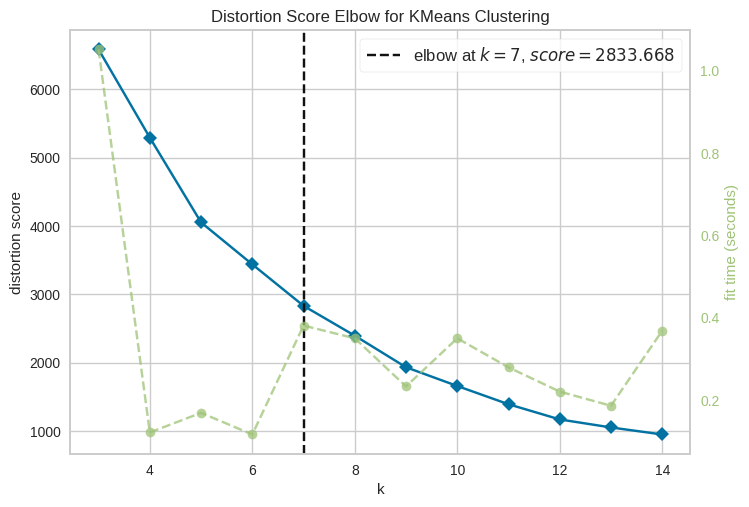

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [34]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(3,15))
visualizer.fit(x_std)
visualizer.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

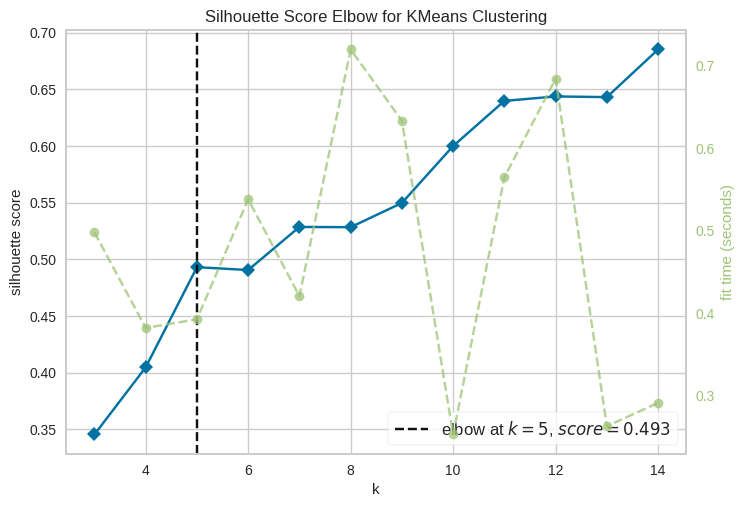

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [35]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(3,15),metric='silhouette')
visualizer.fit(x_std)
visualizer.show()

In [36]:
kmeans = KMeans(n_clusters=5).fit(x_std)
barragem['Cluster'] = kmeans.labels_
barragem.head()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,Categoria de Risco - CRI,Dano Potencial Associado - DPA,Necessita de PAEBM,Inserido na PNSB,Nível de Emergência,Situação operacional da Back Up Dam,Vida útil prevista da Back Up Dam (Anos),Posicionamento (Back Up Dam),Altura Máxima do projeto da Back Up Dam (m),Teor (%) do minério principal inserido no rejeito,Tipo de Barragem de Mineração_Barragem/Barramento/Dique,Tipo de Barragem de Mineração_Cava com Barramento Construído,Tipo de Barragem de Mineração_Empilhamento drenado construído hidraulicamente e suscetível à liquefação,Cluster
0,3,3,1,1,1,0,0.0,1,0.0,0.05,1,0,0,2
1,2,1,0,0,0,0,0.0,1,0.0,0.04,1,0,0,0
2,3,2,0,1,1,0,0.0,1,0.0,0.05,1,0,0,0
3,3,3,1,1,1,0,0.0,1,0.0,0.04,1,0,0,2
4,3,3,1,1,1,0,0.0,1,0.0,0.05,1,0,0,2


<Axes: xlabel='Cluster', ylabel='count'>

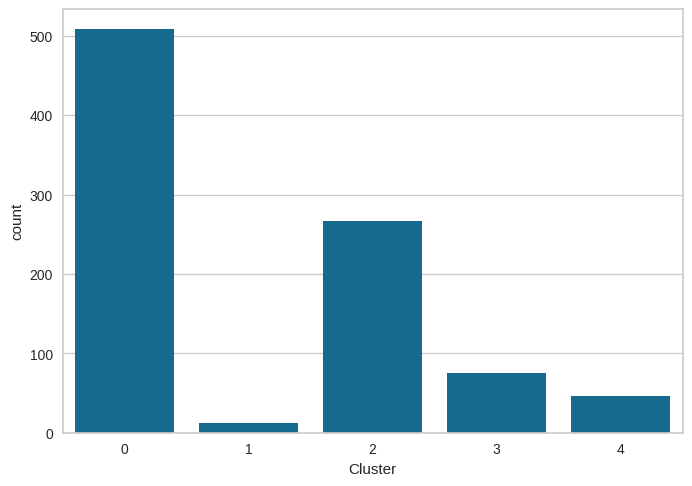

In [38]:
sns.countplot(x='Cluster',data=barragem)

<Axes: xlabel='Cluster', ylabel='count'>

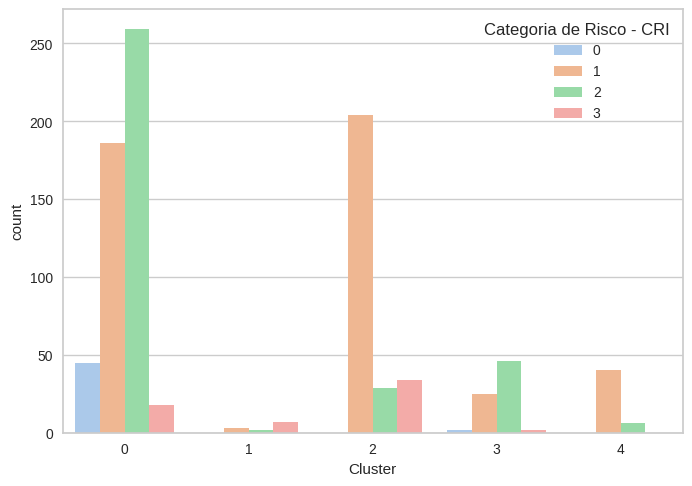

In [42]:
sns.countplot(hue='Categoria de Risco - CRI',x='Cluster',data=barragem,palette='pastel')

<Axes: xlabel='Cluster', ylabel='count'>

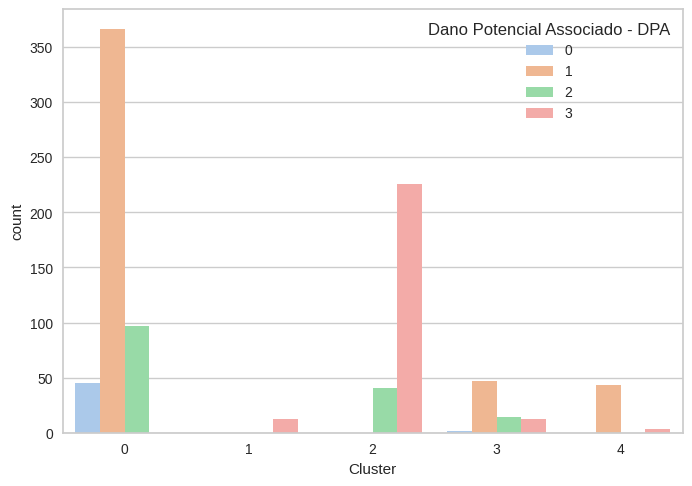

In [43]:
sns.countplot(hue='Dano Potencial Associado - DPA',x='Cluster',data=barragem,palette='pastel')

<Axes: xlabel='Cluster', ylabel='count'>

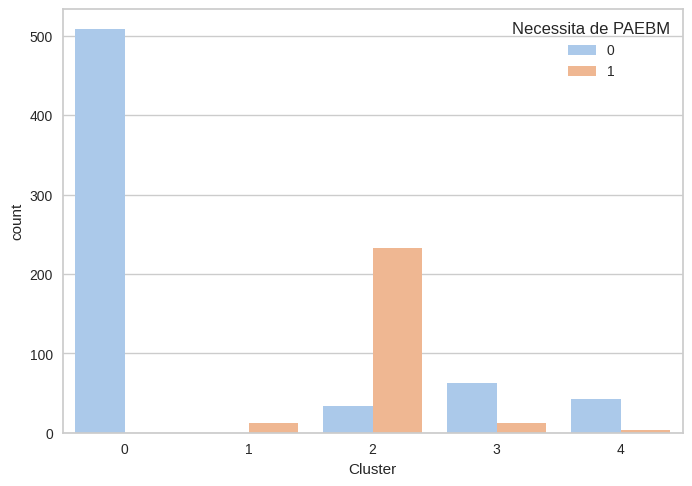

In [44]:
sns.countplot(hue='Necessita de PAEBM',x='Cluster',data=barragem,palette='pastel')

<Axes: xlabel='Cluster', ylabel='count'>

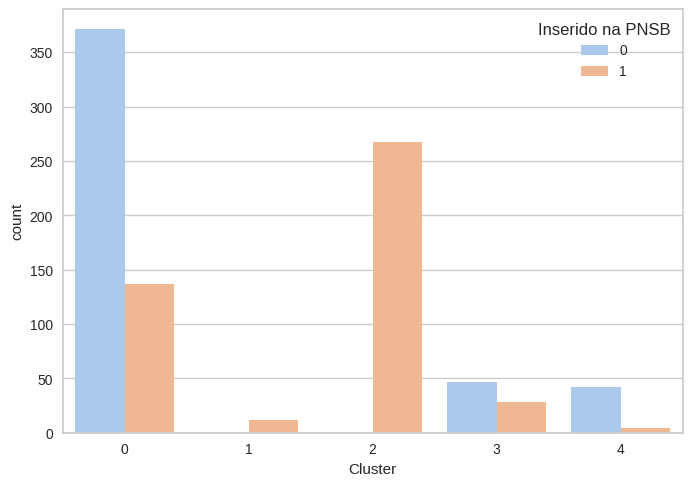

In [45]:
sns.countplot(hue='Inserido na PNSB',x='Cluster',data=barragem,palette='pastel')

<Axes: xlabel='Cluster', ylabel='count'>

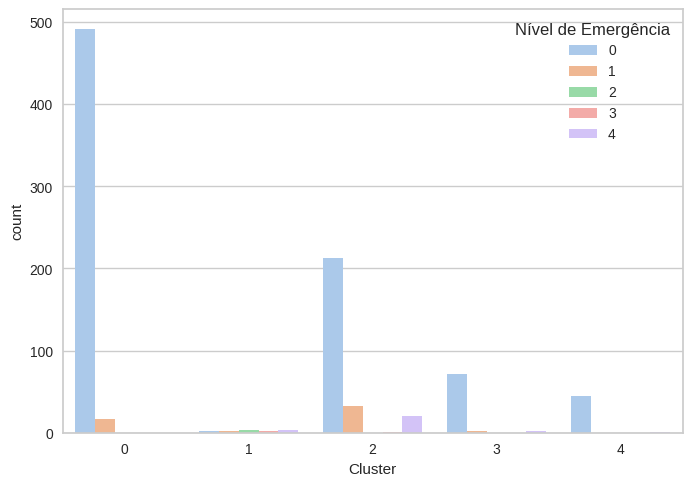

In [46]:
sns.countplot(hue='Nível de Emergência',x='Cluster',data=barragem,palette='pastel')

<Axes: xlabel='Cluster', ylabel='count'>

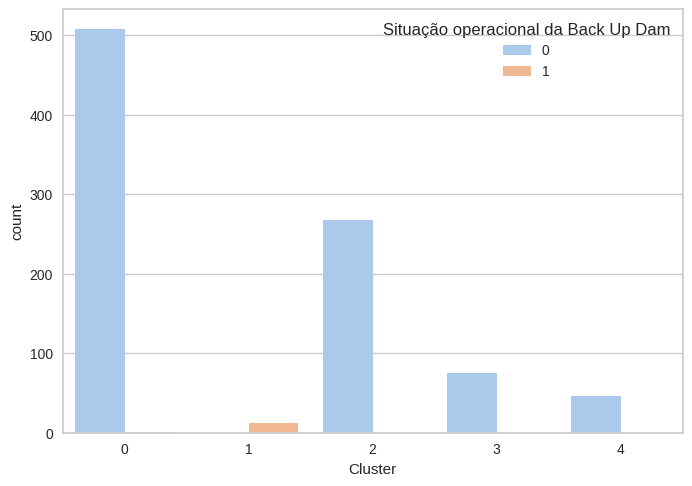

In [47]:
sns.countplot(hue='Situação operacional da Back Up Dam',x='Cluster',data=barragem,palette='pastel')

<Axes: xlabel='Cluster', ylabel='count'>

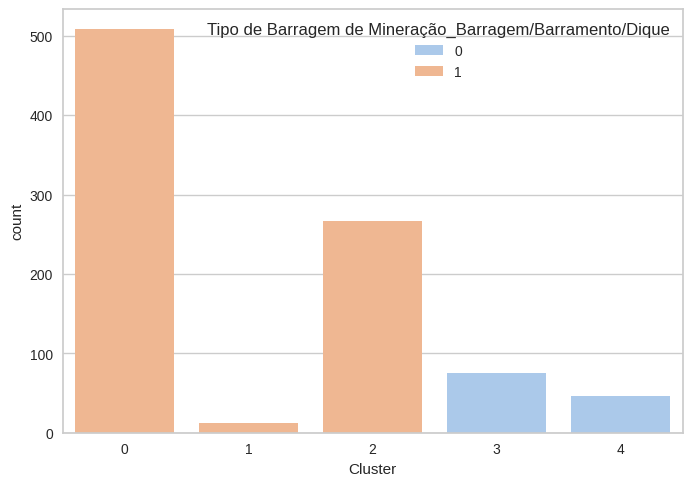

In [48]:
sns.countplot(hue='Tipo de Barragem de Mineração_Barragem/Barramento/Dique',x='Cluster',data=barragem,palette='pastel')

<Axes: xlabel='Cluster', ylabel='count'>

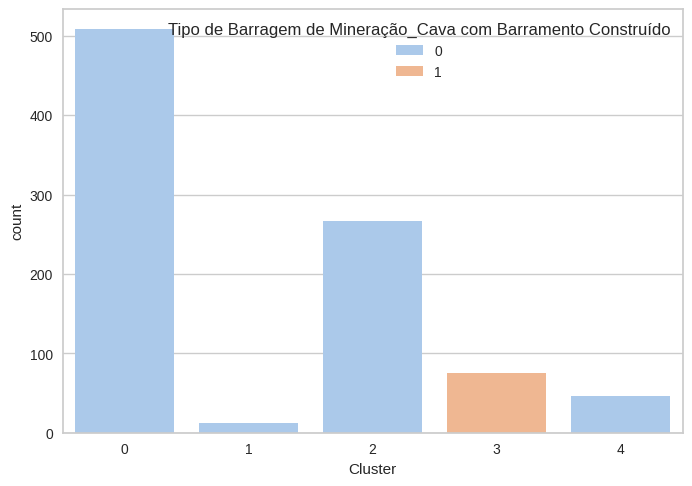

In [49]:
sns.countplot(hue='Tipo de Barragem de Mineração_Cava com Barramento Construído',x='Cluster',data=barragem,palette='pastel')

<Axes: xlabel='Cluster', ylabel='count'>

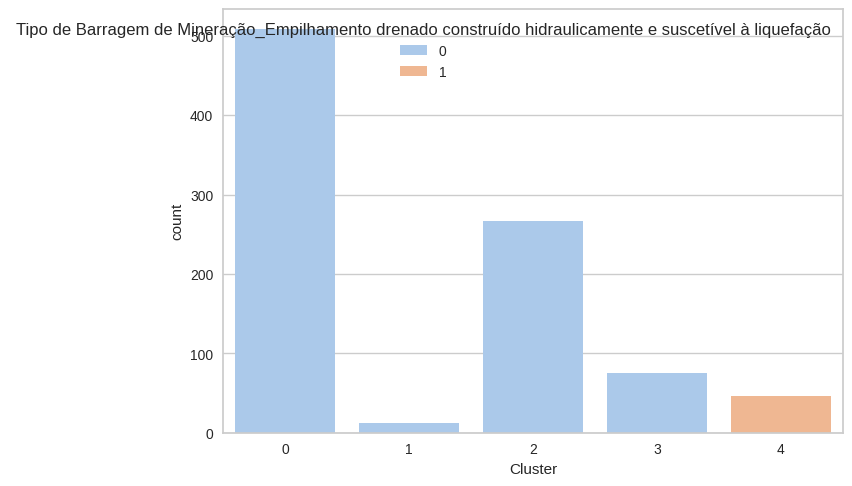

In [50]:
sns.countplot(hue='Tipo de Barragem de Mineração_Empilhamento drenado construído hidraulicamente e suscetível à liquefação',
              x='Cluster',data=barragem,palette='pastel')

<Axes: xlabel='Cluster', ylabel='Teor (%) do minério principal inserido no rejeito'>

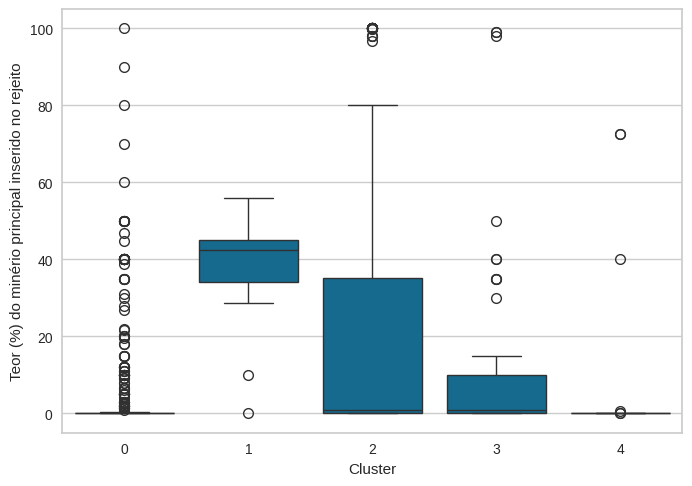

In [51]:
sns.boxplot(x='Cluster',y='Teor (%) do minério principal inserido no rejeito',data=barragem)

<Axes: xlabel='Cluster', ylabel='Altura Máxima do projeto da Back Up Dam (m)'>

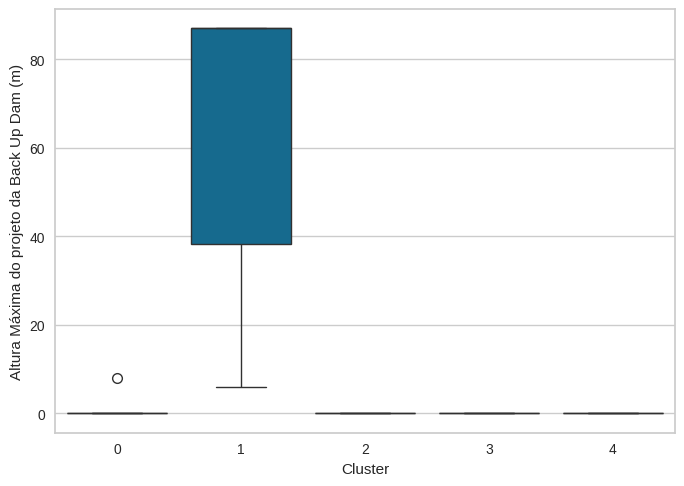

In [52]:
sns.boxplot(x='Cluster',y='Altura Máxima do projeto da Back Up Dam (m)',data=barragem)

In [53]:
barragem.to_csv('barragem com cluster.csv')